# 1. Scraping the Data
#### First we start off by importing the necessary libraries. 

In [1]:
!pip install beautifulsoup4
!pip install lxml
import requests 
import pandas as pd 
import numpy as np 
import random 
!pip install geopy
from geopy.geocoders import Nominatim 

from IPython.display import Image 
from IPython.core.display import HTML 
from IPython.display import display_html

from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize

from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

! pip install folium==0.5.0
import folium 

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 122kB 6.9MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 14.8MB/s eta 0:00:01
     |████████████████████████████████| 112kB 6.2MB/s eta 0:00:01
Folium installed
Libraries imported.


#### Import data for cities in Minnesota. I focused mostly on finding a source that listed zip codes.

In [2]:
minneapolis_data = requests.get('https://www.zipdatamaps.com/list-of-zip-codes-in-minnesota.php').text
soup=BeautifulSoup(minneapolis_data,'lxml')
print(soup.title)
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of Zip Codes in Minnesota</title>


55001,Non-Unique,Afton,Washington
55002,PO Box,Almelund,Chisago
55003,Non-Unique,Bayport,Washington
55005,Non-Unique,Bethel,Anoka
55006,Non-Unique,Braham,Kanabec
55007,Non-Unique,Brook Park,Kanabec
55008,Non-Unique,Cambridge,Isanti
55009,Non-Unique,Cannon Falls,Goodhue
55010,PO Box,Castle Rock,Dakota
55011,Non-Unique,Cedar,Anoka
55012,Non-Unique,Center City,Chisago


In [3]:
dfs = pd.read_html(tab)
df=dfs[0]
df.head()

,Zip Code,Zip Code Type,Zip Code Name,County
0,55001,Non-Unique,Afton,Washington
1,55002,PO Box,Almelund,Chisago
2,55003,Non-Unique,Bayport,Washington
3,55005,Non-Unique,Bethel,Anoka
4,55006,Non-Unique,Braham,Kanabec


# 2. Pre-Processing
#### I decided to include only cities that are located in Hennepin county due to the large number of small cities in Minnesota. I also deleted any duplicate cities listed on the graph. 

In [4]:
df2 = df.loc[df['County'] == 'Hennepin']
df2

,Zip Code,Zip Code Type,Zip Code Name,County
88,55111,Non-Unique,Saint Paul,Hennepin
130,55305,Non-Unique,Hopkins,Hennepin
136,55311,Non-Unique,Osseo,Hennepin
141,55316,Non-Unique,Champlin,Hennepin
148,55323,PO Box,Crystal Bay,Hennepin
...,...,...,...,...
334,55595,PO Box,Loretto,Hennepin
335,55596,PO Box,Loretto,Hennepin
336,55597,PO Box,Loretto,Hennepin
337,55598,PO Box,Loretto,Hennepin


In [5]:
df_minneapolis = df.loc[df['Zip Code Name'] == 'Minneapolis']
df_minneapolis

,Zip Code,Zip Code Type,Zip Code Name,County
223,55401,Non-Unique,Minneapolis,Hennepin
224,55402,Non-Unique,Minneapolis,Hennepin
225,55403,Non-Unique,Minneapolis,Hennepin
226,55404,Non-Unique,Minneapolis,Hennepin
227,55405,Non-Unique,Minneapolis,Hennepin
...,...,...,...,...
287,55484,Unique,Minneapolis,Hennepin
288,55485,Unique,Minneapolis,Hennepin
289,55486,Unique,Minneapolis,Hennepin
290,55487,Unique,Minneapolis,Hennepin


In [6]:
minn_df = df_minneapolis.drop(columns=['Zip Code Type', 'County'])
minn_df

,Zip Code,Zip Code Name
223,55401,Minneapolis
224,55402,Minneapolis
225,55403,Minneapolis
226,55404,Minneapolis
227,55405,Minneapolis
...,...,...
287,55484,Minneapolis
288,55485,Minneapolis
289,55486,Minneapolis
290,55487,Minneapolis


In [7]:
minn_df2 = minn_df.rename(columns={"Zip Code": "Zip_Code"})
minn_df2

,Zip_Code,Zip Code Name
223,55401,Minneapolis
224,55402,Minneapolis
225,55403,Minneapolis
226,55404,Minneapolis
227,55405,Minneapolis
...,...,...
287,55484,Minneapolis
288,55485,Minneapolis
289,55486,Minneapolis
290,55487,Minneapolis


# 3. Finding Coordinates
#### Next, I gathered coordinated for the cities listed in my table. 

In [8]:
geolocator = Nominatim(user_agent='my-app-location')
long_lang_city = minn_df2.copy()
location = long_lang_city.Zip_Code.apply(lambda borough: geolocator.geocode(borough))
long_lang_city['latitude'] = [x.latitude for x in location]
long_lang_city['longtitude'] = [x.longitude for x in location]
long_lang_city

,Zip_Code,Zip Code Name,latitude,longtitude
223,55401,Minneapolis,44.989102,-93.279598
224,55402,Minneapolis,35.975286,127.425416
225,55403,Minneapolis,44.973877,-93.287077
226,55404,Minneapolis,44.961096,-93.255894
227,55405,Minneapolis,44.957127,-93.302787
...,...,...,...,...
287,55484,Minneapolis,55.086928,24.528594
288,55485,Minneapolis,47.778473,31.717644
289,55486,Minneapolis,55.081502,24.537195
290,55487,Minneapolis,49.916981,7.330926


#### I created a map to visualize the cities I am working with. 

In [14]:
map_minneapolis = folium.Map(location=[44.973877,-93.287077], zoom_start=10)

for latitude, longtitude, Zip_Code in zip(long_lang_city['latitude'], long_lang_city['longtitude'], long_lang_city['Zip_Code']):
    dist = Zip_Code[1:3]
    label = '{}. {}'.format(dist, Zip_Code)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longtitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_minneapolis)  
    
map_minneapolis

# 4. Gathering Venues
#### Using Foursquare API, I pulled a list of venues in Minneaoplis county based on the coordinates I just found. 

In [15]:
# @hidden_cell
CLIENT_ID = '0MK4MVL5H3Y3G0WKZOFBGSZCLI01IPZRGUXXEOJMBB3SRGD4' # your Foursquare ID
CLIENT_SECRET = 'FLFHN5QR1HCYQIY2PBIOX4OWSH1VH4G3F1NME3VRHBFFBY1A' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [16]:
LIMIT = 100

def getNeighborhoodVenues( latitude, longtitude,neighborhood, radius=1000 ):
    venues = []
    for latitude, longtitude, neighborhood in zip(latitude, longtitude ,neighborhood):

        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            latitude,
            longtitude,
            radius, 
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        for venue in results:
            venues.append((
                neighborhood,
                latitude, 
                longtitude, 
                venue['venue']['name'], 
                venue['venue']['id'], 
                venue['venue']['location']['lat'], 
                venue['venue']['location']['lng'],  
                venue['venue']['location']['distance'],  
                venue['venue']['categories'][0]['name']))
    
    # convert the venues list into a DataFrame
    venues = pd.DataFrame(venues)
    # define the column names
    venues.columns = ['Neighborhood', 'Latitude', 'Longtitude', 'VenueName', 'VenueId', 'VenueLatitude', 'VenueLongitude','VenueDistance','VenueCategory']
            
    return venues 

neighborhood_venues = getNeighborhoodVenues (long_lang_city['latitude'], long_lang_city['longtitude'], long_lang_city['Zip_Code'] )

print('There are {} unique venue categories. Some of them are as below:'.format(len(neighborhood_venues['VenueCategory'].unique())))
neighborhood_venues.head()

There are 296 unique venue categories. Some of them are as below:


,Neighborhood,Latitude,Longtitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory
0,55401,44.989102,-93.279598,Parlour,50f5094ee4b0ebcba2efe174,44.988849,-93.278188,114,Cocktail Bar
1,55401,44.989102,-93.279598,Bar La Grassa,4acc0172f964a52093c820e3,44.989180,-93.278889,56,Italian Restaurant
2,55401,44.989102,-93.279598,Borough,50cfb1c8e4b09858eca57a84,44.988864,-93.278337,102,American Restaurant
3,55401,44.989102,-93.279598,Spyhouse West,5592dcf5498effd538186ffe,44.989868,-93.280107,94,Coffee Shop
4,55401,44.989102,-93.279598,Wrecktangle Pizza,5e0900ca4299540008e75f20,44.988101,-93.277652,189,Pizza Place


In [17]:
print('Top 10 distinct venue counts are as below')
top_venues = neighborhood_venues[['VenueId','VenueCategory']].drop_duplicates().groupby('VenueCategory').count()[['VenueId']].rename(columns={"VenueId": "Count"}).sort_values(by=['Count'], ascending=False)[:10]
top_venues

Top 10 distinct venue counts are as below


,Count
VenueCategory,
Coffee Shop,104
Park,66
Sandwich Place,58
American Restaurant,57
Pizza Place,54
Hotel,39
Fast Food Restaurant,34
Mexican Restaurant,34
Gym,31


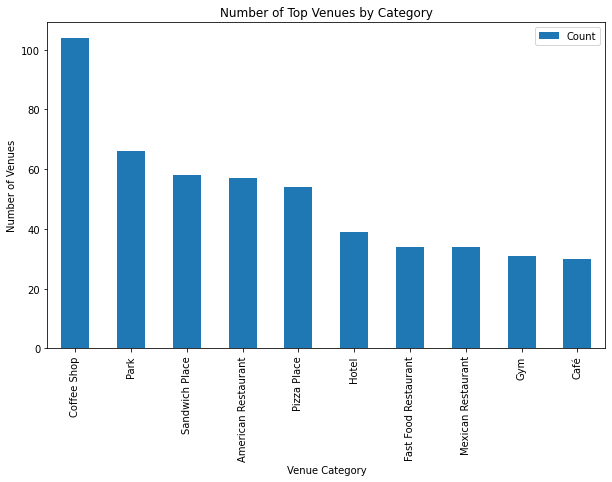

In [18]:
import matplotlib.pyplot as plt

top_venues.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Top Venues by Category')
plt.ylabel('Number of Venues')
plt.xlabel('Venue Category')

plt.show()

#### Next I singled out restaurants to focus on the various types of cuisines available in the county. 

In [19]:
hennepin_rest = neighborhood_venues[neighborhood_venues['VenueCategory'].str.contains("Restaurant")]
print('There are {} unique categories or cusines available in Hennepin County.'.format(len(hennepin_rest['VenueCategory'].unique())))

There are 42 unique categories or cusines available in Hennepin County.


In [20]:
hennepin_rest.head()

,Neighborhood,Latitude,Longtitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory
1,55401,44.989102,-93.279598,Bar La Grassa,4acc0172f964a52093c820e3,44.989180,-93.278889,56,Italian Restaurant
2,55401,44.989102,-93.279598,Borough,50cfb1c8e4b09858eca57a84,44.988864,-93.278337,102,American Restaurant
7,55401,44.989102,-93.279598,Smack Shack,50eb3ee3e4b0f87abab3bc5d,44.986776,-93.276259,369,Seafood Restaurant
28,55401,44.989102,-93.279598,JUN,5881834d58c4d170e34e70c6,44.988480,-93.277802,157,Asian Restaurant
29,55401,44.989102,-93.279598,Nolo's Kitchen & Bar,59d633d2d1a40277e61a2d2c,44.986233,-93.275624,447,American Restaurant


In [21]:
map_rest = folium.Map(location=[44.977300,-93.265469], zoom_start=10)

for latitude, longtitude, VenueName in zip(hennepin_rest['VenueLatitude'], hennepin_rest['VenueLongitude'], hennepin_rest['VenueName']):
    dist = VenueName[1:3]
    label = '{}. {}'.format(dist, VenueName)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longtitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_rest)  
    
map_rest

In [22]:
rest_type = hennepin_rest[['VenueId','VenueCategory']].groupby('VenueCategory').count()[['VenueId']].rename(columns={"VenueId": "Count"}).sort_values(by=['Count'], ascending=False)
rest_type

,Count
VenueCategory,
American Restaurant,61
Fast Food Restaurant,38
Mexican Restaurant,36
Chinese Restaurant,31
Asian Restaurant,25
New American Restaurant,23
Italian Restaurant,22
Restaurant,16
Vietnamese Restaurant,15


#### Next I took a look at which types of restaurants are most popular throughout all the cities. 

In [23]:
top_rest_type = rest_type.head(10)
top_rest_type

,Count
VenueCategory,
American Restaurant,61
Fast Food Restaurant,38
Mexican Restaurant,36
Chinese Restaurant,31
Asian Restaurant,25
New American Restaurant,23
Italian Restaurant,22
Restaurant,16
Vietnamese Restaurant,15


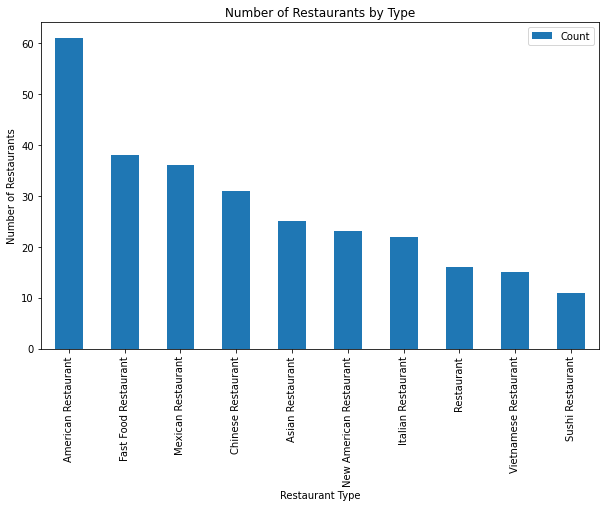

In [24]:
#Graph restaurants by type
top_rest_type.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Restaurants by Type')
plt.ylabel('Number of Restaurants')
plt.xlabel('Restaurant Type')

plt.show()

#### It was also important to me to understand the number of restaurants per city.

In [25]:
rest_city = hennepin_rest[['VenueId','Neighborhood']].groupby('Neighborhood').count()[['VenueId']].rename(columns={"VenueId": "Count"}).sort_values(by=['Count'], ascending=False)
rest_city

,Count
Neighborhood,
55467,39
55455,27
55488,22
55410,22
55414,22
55426,20
55415,17
55405,16
55403,16


In [26]:
rest_city.describe()

,Count
count,42.000000
mean,9.285714
std,8.480352
min,1.000000
25%,3.000000
50%,6.500000
75%,13.750000
max,39.000000


In [27]:
top_rest_city = rest_city.head(10)
top_rest_city

,Count
Neighborhood,
55467,39
55455,27
55488,22
55410,22
55414,22
55426,20
55415,17
55405,16
55403,16


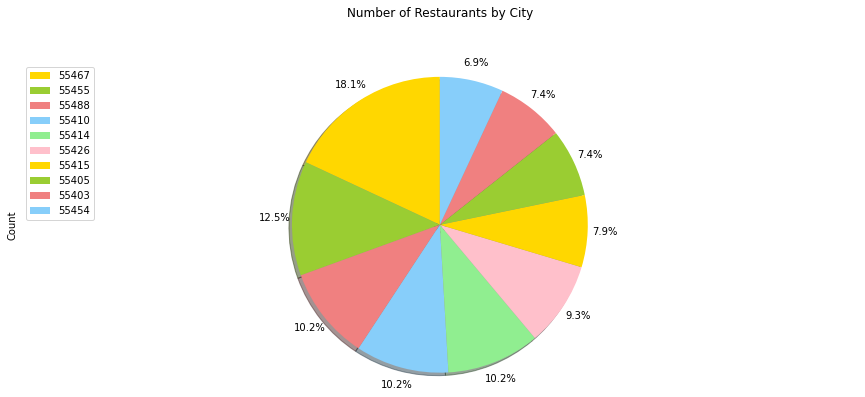

In [28]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']


top_rest_city['Count'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            )

# scale the title up by 12% to match pctdistance
plt.title('Number of Restaurants by City', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=top_rest_city.index, loc='upper left') 

plt.show()

#### Putting the two together, I looked at type of cuisine by city.

In [29]:
# one hot encoding
hennepin_onehot = pd.get_dummies(hennepin_rest[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hennepin_onehot['Neighborhood'] = hennepin_rest['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [hennepin_onehot.columns[-1]] + list(hennepin_onehot.columns[:-1])
hennepin_onehot = hennepin_onehot[fixed_columns]

hennepin_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Empanada Restaurant,English Restaurant,...,Seafood Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,55401,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,55401,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,55401,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
28,55401,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,55401,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
henn_rest_gb = hennepin_onehot.groupby('Neighborhood').mean().reset_index()
henn_rest_gb

,Neighborhood,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Empanada Restaurant,English Restaurant,...,Seafood Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,55401,0.000000,0.272727,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,55403,0.000000,0.250000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.0625,...,0.062500,0.000000,0.000000,0.062500,0.000000,0.000000,0.0,0.000000,0.000000,0.062500
2,55404,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,55405,0.000000,0.250000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.0,0.000000,0.062500,0.062500
4,55406,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5,55407,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
6,55408,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.0000,...,0.100000,0.000000,0.100000,0.100000,0.000000,0.200000,0.0,0.000000,0.000000,0.000000
7,55409,0.000000,0.214286,0.000000,0.000000,0.000000,0.071429,0.071429,0.071429,0.0000,...,0.000000,0.071429,0.071429,0.071429,0.071429,0.000000,0.0,0.000000,0.000000,0.000000
8,55410,0.000000,0.090909,0.000000,0.045455,0.000000,0.090909,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.045455,0.000000,0.045455,0.0,0.000000,0.000000,0.000000
9,55411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000


In [31]:
city_rest_gb = hennepin_onehot.groupby('Neighborhood').sum().reset_index()
city_rest_gb

,Neighborhood,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Empanada Restaurant,English Restaurant,...,Seafood Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,55401,0,3,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,55403,0,4,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
2,55404,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,55405,0,4,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
4,55406,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,55407,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,55408,0,0,0,0,0,1,1,0,0,...,1,0,1,1,0,2,0,0,0,0
7,55409,0,3,0,0,0,1,1,1,0,...,0,1,1,1,1,0,0,0,0,0
8,55410,0,2,0,1,0,2,0,0,0,...,0,0,0,1,0,1,0,0,0,0
9,55411,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0


In [32]:
rest_type_top = city_rest_gb[['Neighborhood','American Restaurant', 'Fast Food Restaurant','Mexican Restaurant','Chinese Restaurant','Asian Restaurant','New American Restaurant','Italian Restaurant','Restaurant','Vietnamese Restaurant','Sushi Restaurant']]
rest_type_top

,Neighborhood,American Restaurant,Fast Food Restaurant,Mexican Restaurant,Chinese Restaurant,Asian Restaurant,New American Restaurant,Italian Restaurant,Restaurant,Vietnamese Restaurant,Sushi Restaurant
0,55401,3,0,0,0,1,2,2,0,0,0
1,55403,4,0,1,1,0,3,1,2,1,1
2,55404,0,1,0,1,0,0,0,1,0,0
3,55405,4,0,2,0,1,1,2,0,1,1
4,55406,1,0,0,1,1,0,0,0,0,0
5,55407,0,0,0,0,0,0,1,0,0,0
6,55408,0,0,0,1,0,2,1,0,0,1
7,55409,3,0,1,1,0,1,0,0,0,1
8,55410,2,0,3,2,1,1,4,4,0,1
9,55411,0,1,0,0,0,1,0,0,0,0


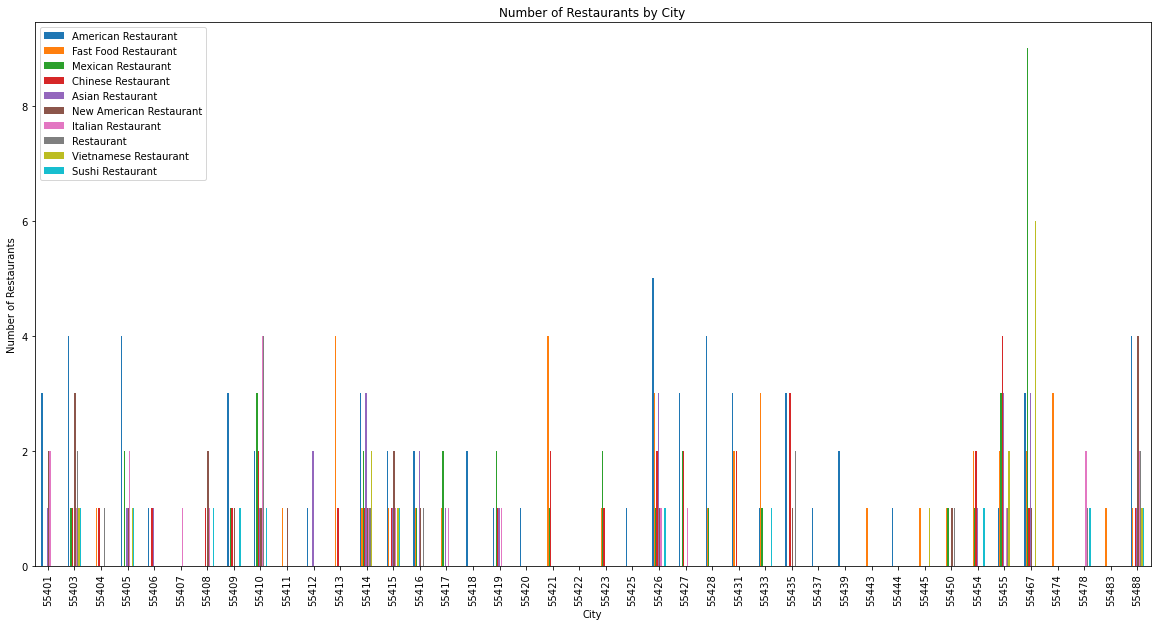

In [33]:
rest_type_top.plot(kind='bar', x = 'Neighborhood', figsize=(20, 10))
plt.title('Number of Restaurants by City')
plt.ylabel('Number of Restaurants')
plt.xlabel('City')

plt.show()

# Let's take a look at Mexican Restaurants

In [34]:
hennepin_mex = neighborhood_venues[neighborhood_venues['VenueCategory'].str.contains("Mexican Restaurant")]
hennepin_mex.head()

,Neighborhood,Latitude,Longtitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory
149,55403,44.973877,-93.287077,Barrio Tequila Bar,4869ed21f964a520f0501fe3,44.974180,-93.274506,990,Mexican Restaurant
222,55405,44.957127,-93.302787,Nico's Taco and Tequila,5229fff711d27c46836efb5e,44.956728,-93.296119,527,Mexican Restaurant
252,55405,44.957127,-93.302787,Chipotle Mexican Grill,49de9c57f964a5208d601fe3,44.955352,-93.297220,481,Mexican Restaurant
424,55409,44.926239,-93.280161,Pepitos Mexi-Go Deli,49d0050ff964a520f75a1fe3,44.918839,-93.278446,834,Mexican Restaurant
495,55410,44.916353,-93.318537,Cocina Del Barrio,4d08322384ec224b2a8b2862,44.911460,-93.329185,1000,Mexican Restaurant


In [37]:
map_mex = folium.Map(location=[44.973877,-93.287077], zoom_start=10)

for latitude, longtitude, VenueName in zip(hennepin_mex['VenueLatitude'], hennepin_mex['VenueLongitude'], hennepin_mex['VenueName']):
    dist = VenueName[1:3]
    label = '{}. {}'.format(dist, VenueName)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longtitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mex)  
    
map_mex

#### Now I will pull the ratings for each Mexican Restaurant.

In [38]:
mex_city = hennepin_mex[['VenueId','Neighborhood']].groupby('Neighborhood').count()[['VenueId']].rename(columns={"VenueId": "Count"}).sort_values(by=['Count'], ascending=False)
mex_city

,Count
Neighborhood,
55467,9
55455,3
55410,3
55419,2
55427,2
55405,2
55423,2
55417,2
55414,2


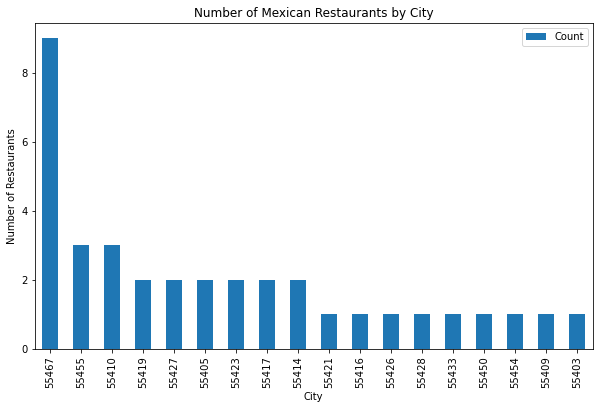

In [39]:
#Graph by city
mex_city.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Mexican Restaurants by City')
plt.ylabel('Number of Restaurants')
plt.xlabel('City')

plt.show()

In [33]:
#Find ratings by rest
def getVenueRatings(venues):
    
    ratings = []
    for venueId in venues:

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venueId, CLIENT_ID, CLIENT_SECRET, VERSION)
        result = requests.get(url).json()
        try:
            rating = result['response']['venue']['rating']
        except:
            rating = None
        
        ratings.append((venueId, rating))
 
    # convert the venues list into a DataFrame
    rating = pd.DataFrame(ratings)
    # define the column names
    rating.columns = ['VenueId', 'VenueRating']

    return rating    

restaurants_ratings = getVenueRatings(hennepin_mex['VenueId'].drop_duplicates())
restaurants_ratings

,VenueId,VenueRating
0,4869ed21f964a520f0501fe3,7.8
1,5229fff711d27c46836efb5e,8.5
2,49de9c57f964a5208d601fe3,7.1
3,49d0050ff964a520f75a1fe3,6.3
4,4d08322384ec224b2a8b2862,7.0
5,5cdcbcd664c8e1002c39ce5d,NaN
6,5a209db9e679bc15e554285e,NaN
7,4a10d447f964a52002771fe3,7.7
8,428a8580f964a5208e231fe3,6.1
9,4bc4c304b492d13abd87aa60,7.6


In [37]:
mex_ratings = restaurants_ratings.dropna()
mex_ratings

,VenueId,VenueRating
0,4869ed21f964a520f0501fe3,7.8
1,5229fff711d27c46836efb5e,8.5
2,49de9c57f964a5208d601fe3,7.1
3,49d0050ff964a520f75a1fe3,6.3
4,4d08322384ec224b2a8b2862,7.0
7,4a10d447f964a52002771fe3,7.7
8,428a8580f964a5208e231fe3,6.1
9,4bc4c304b492d13abd87aa60,7.6
10,4a4c07bdf964a520faac1fe3,8.3
11,4d814d37f724a093eb0a1ff7,6.2


In [38]:
mex_ratings.describe()

,VenueRating
count,31.000000
mean,7.367742
std,0.916656
min,5.500000
25%,6.800000
50%,7.500000
75%,8.050000
max,9.000000


In [39]:
info_mex = hennepin_mex.merge(mex_ratings, on = 'VenueId')
info_mex.head()

,Neighborhood,Latitude,Longtitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,VenueRating
0,55403,44.973877,-93.287077,Barrio Tequila Bar,4869ed21f964a520f0501fe3,44.974180,-93.274506,990,Mexican Restaurant,7.8
1,55488,44.975613,-93.268257,Barrio Tequila Bar,4869ed21f964a520f0501fe3,44.974180,-93.274506,517,Mexican Restaurant,7.8
2,55405,44.957127,-93.302787,Nico's Taco and Tequila,5229fff711d27c46836efb5e,44.956728,-93.296119,527,Mexican Restaurant,8.5
3,55405,44.957127,-93.302787,Chipotle Mexican Grill,49de9c57f964a5208d601fe3,44.955352,-93.297220,481,Mexican Restaurant,7.1
4,55409,44.926239,-93.280161,Pepitos Mexi-Go Deli,49d0050ff964a520f75a1fe3,44.918839,-93.278446,834,Mexican Restaurant,6.3


In [43]:
mex_names = info_mex[["VenueName", "VenueRating", "Neighborhood"]].sort_values(by = 'VenueRating', ascending=False)
mex_names

,VenueName,VenueRating,Neighborhood
13,La Fresca - Nouveau Mexican Cuisine,9.0,55419
25,Taqueria La Hacienda,8.8,55467
2,Nico's Taco and Tequila,8.5,55405
14,El Taco Loco Food Truck,8.5,55421
26,Taco Cat,8.5,55467
11,Dominguez Family Restaurant,8.3,55417
23,Bar Luchador,8.3,55455
27,Manny's Tortas,8.2,55467
28,La Loma Tamales,7.9,55467
0,Barrio Tequila Bar,7.8,55403
